In [4]:
import pandas as pd

file_path = '/home/hbt/jchr_data/jchr_racial_diff/results/processed_data/2_1_1_predicted_results_rnn_wb/2_1_1_predicted_results_rnn_wb_v4/3_1_1_calculated_results.csv'
df = pd.read_csv(file_path)


In [5]:
import seaborn as sns
df_gr1 = df[df['race'] == 'white']
df_gr2 = df[df['race'] == 'black']

def calc_stats_results(df):
  
    import numpy as np
    import seaborn as sns

    # List of RMSE columns
    rmse_columns = [col for col in df.columns if 'rmse_' in col]

    # Initialize a list to store each row of the final DataFrame
    rows_list = []

    # Loop over each ratio_w value
    for ratio in df['ratio'].unique():
        # Filter the DataFrame for the current ratio
        df_ratio = df[df['ratio'] == ratio]
        
        # Initialize a dictionary to store the stats for the current ratio
        stats_dict = {'ratio': ratio}
        
        # Calculate the statistics for each RMSE column
        for col in rmse_columns:
            col_data = df_ratio[col].dropna()  # Exclude NaN values for the calculation
            mean = col_data.mean()
            median = col_data.median()
            std = col_data.std()
            # Confidence interval calculation
            ci_lower = mean - 1.96 * (std / np.sqrt(len(col_data)))
            ci_upper = mean + 1.96 * (std / np.sqrt(len(col_data)))
            
            # Store the statistics in the dictionary
            stats_dict[f'{col}_mean'] = mean
            stats_dict[f'{col}_median'] = median
            stats_dict[f'{col}_std'] = std
            stats_dict[f'{col}_95p_CI_Lower'] = ci_lower
            stats_dict[f'{col}_95p_CI_Upper'] = ci_upper

        # Append the stats for the current ratio to the rows_list
        rows_list.append(stats_dict)

    # Create the final DataFrame
    df_stats = pd.DataFrame(rows_list)
    return df_stats

df_stats_gr1 = calc_stats_results(df_gr1)
df_stats_gr2 = calc_stats_results(df_gr2)

In [6]:
df_stats_gr1

,ratio,rmse_naive_mean,rmse_naive_median,rmse_naive_std,rmse_naive_95p_CI_Lower,rmse_naive_95p_CI_Upper,rmse_base_mean,rmse_base_median,rmse_base_std,rmse_base_95p_CI_Lower,rmse_base_95p_CI_Upper,rmse_tl_mean,rmse_tl_median,rmse_tl_std,rmse_tl_95p_CI_Lower,rmse_tl_95p_CI_Upper
0,0,5.636259,5.143196,1.731401,5.298588,5.973929,2.845290,2.699097,0.798556,2.689550,3.001030,2.062999,2.017417,0.494146,1.966627,2.159371
1,90,5.636259,5.143196,1.731401,5.298588,5.973929,2.775297,2.637763,0.772081,2.624720,2.925874,2.066088,1.996128,0.496057,1.969343,2.162832
2,60,5.636259,5.143196,1.731401,5.298588,5.973929,2.791861,2.646425,0.777524,2.640223,2.943500,2.065278,2.001907,0.496694,1.968409,2.162147
3,70,5.636259,5.143196,1.731401,5.298588,5.973929,2.781501,2.635154,0.779783,2.629422,2.933580,2.064888,2.001074,0.496156,1.968124,2.161652
4,10,5.636259,5.143196,1.731401,5.298588,5.973929,2.844518,2.726230,0.811832,2.686189,3.002848,2.063603,2.008600,0.494040,1.967252,2.159955
5,80,5.636259,5.143196,1.731401,5.298588,5.973929,2.774945,2.616307,0.767484,2.625265,2.924626,2.066223,1.998251,0.497648,1.969169,2.163278
6,20,5.636259,5.143196,1.731401,5.298588,5.973929,2.840842,2.702294,0.804315,2.683979,2.997705,2.063544,2.007889,0.494806,1.967043,2.160045
7,30,5.636259,5.143196,1.731401,5.298588,5.973929,2.834240,2.708365,0.802034,2.677822,2.990658,2.064018,2.005850,0.494854,1.967508,2.160528
8,50,5.636259,5.143196,1.731401,5.298588,5.973929,2.814061,2.647264,0.794321,2.659146,2.968975,2.064773,2.005593,0.495789,1.968080,2.161465
9,40,5.636259,5.143196,1.731401,5.298588,5.973929,2.824850,2.672604,0.805913,2.667675,2.982025,2.064997,2.009838,0.494452,1.968566,2.161429


In [7]:
df

,Unnamed: 0,PtID,ratio,race,rmse_naive,rmse_base,rmse_tl
0,0,8,10,black,9.000105,3.255186,3.201606
1,1,68,60,black,6.352228,1.980686,1.981441
2,2,139,50,black,7.384616,2.454493,2.468106
3,3,125,0,white,4.433374,2.313233,1.779213
4,4,89,90,white,5.881837,3.017881,2.940352
...,...,...,...,...,...,...,...
2250,2250,194,60,black,6.137933,2.098753,1.857448
2251,2251,153,80,white,5.333275,1.963448,1.786144
2252,2252,208,20,black,6.879609,2.730254,2.264064
2253,2253,112,20,white,10.515192,2.750985,2.758095


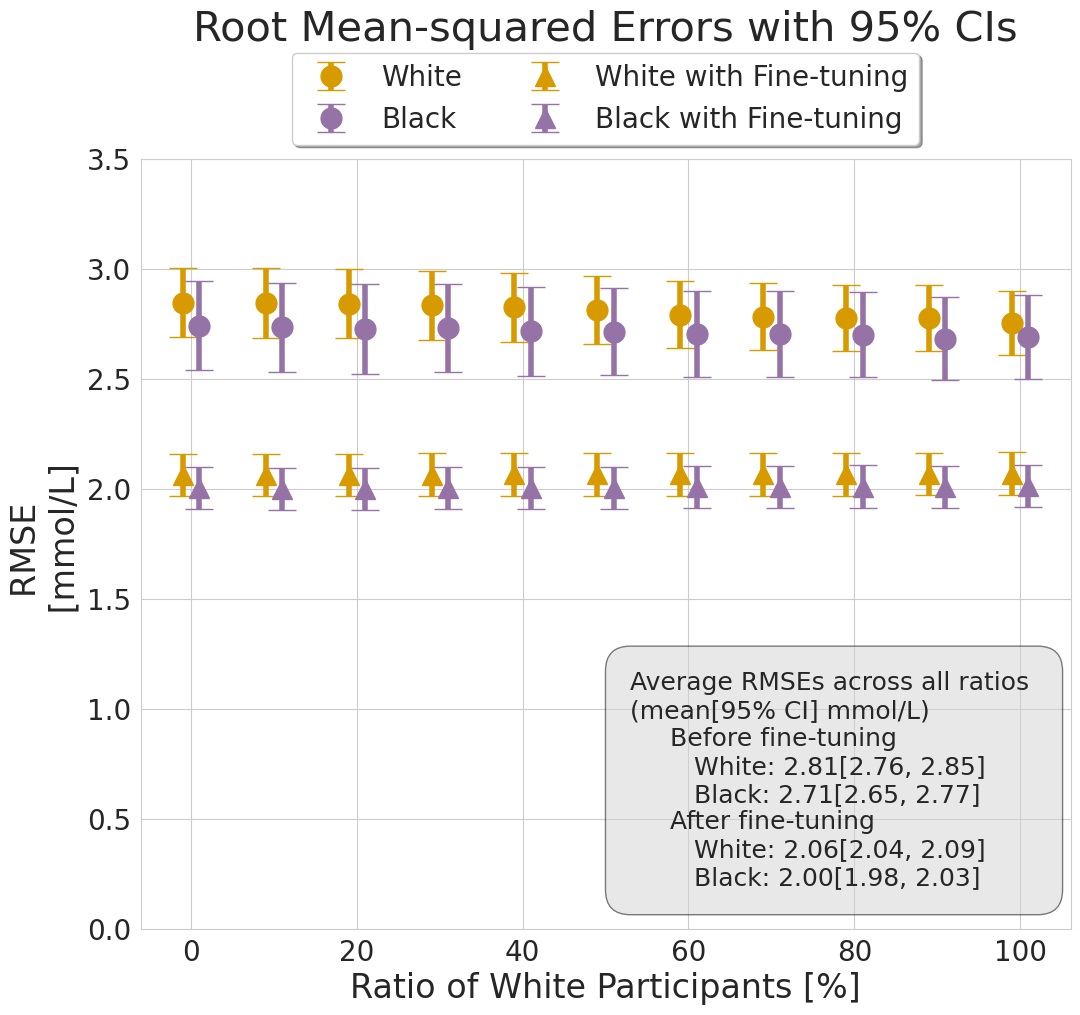

In [14]:
import matplotlib.pyplot as plt

file_name_with_extension = file_path.split("/")[-1]
file_name = file_name_with_extension.split(".")[0]

sns.set_style("whitegrid")
plt.figure(figsize=(12, 10))


rmse_col_gr1 = df_gr1['rmse_base']
rmse_col_gr2 = df_gr2['rmse_base']

rmse_col_tl_gr1 = df_gr1['rmse_tl']
rmse_col_tl_gr2 = df_gr2['rmse_tl']

gr1_color = "#D79B00"
gr2_color = "#9673A6"
alpha_value = 0.5  # saturation
marker1 = "o"
marker2 = "^"


y_group1 = df_stats_gr1['rmse_base_mean']
y_group2 = df_stats_gr2['rmse_base_mean']
y_group1_CI95_l = df_stats_gr1['rmse_base_95p_CI_Lower']
y_group1_CI95_u = df_stats_gr1['rmse_base_95p_CI_Upper']
y_group2_CI95_l = df_stats_gr2['rmse_base_95p_CI_Lower']
y_group2_CI95_u = df_stats_gr2['rmse_base_95p_CI_Upper']


y_group1_tl = df_stats_gr1['rmse_tl_mean']
y_group2_tl = df_stats_gr2['rmse_tl_mean']
y_group1_CI95_l_tl = df_stats_gr1['rmse_tl_95p_CI_Lower']
y_group1_CI95_u_tl = df_stats_gr1['rmse_tl_95p_CI_Upper']
y_group2_CI95_l_tl = df_stats_gr2['rmse_tl_95p_CI_Lower']
y_group2_CI95_u_tl = df_stats_gr2['rmse_tl_95p_CI_Upper']


offset = 1  # How much to offset the bars

x_values_gr1 = df_stats_gr1['ratio'] - offset
x_values_gr2 = df_stats_gr2['ratio'] + offset
x_tl_values_gr1 = df_stats_gr1['ratio'] - offset
x_tl_values_gr2 = df_stats_gr2['ratio']+ offset


# Calculate the errors from the means to the confidence interval limits
yerr_group1 = [y_group1 - y_group1_CI95_l, y_group1_CI95_u - y_group1]
yerr_group2 = [y_group2 - y_group2_CI95_l, y_group2_CI95_u - y_group2]

yerr_group1_tl = [y_group1_tl - y_group1_CI95_l_tl, y_group1_CI95_u_tl - y_group1_tl]
yerr_group2_tl = [y_group2_tl - y_group2_CI95_l_tl, y_group2_CI95_u_tl - y_group2_tl]

# Plot the means with error bars
my_einwidth = 4
plt.errorbar(x=x_values_gr1, y=y_group1, yerr=yerr_group1, fmt=marker1, color=gr1_color, label='White', capsize=10,markersize=15, elinewidth=my_einwidth) # , elinewidth=10, markersize=15, capthick=10)
plt.errorbar(x=x_values_gr2, y=y_group2, yerr=yerr_group2, fmt=marker1, color=gr2_color, label='Black', capsize=10, markersize=15,elinewidth=my_einwidth) # elinewidth=10, markersize=14, capthick=10)


# Plot the transfer learning means with error bars
plt.errorbar(x=x_tl_values_gr1, y=y_group1_tl, yerr=yerr_group1_tl, fmt=marker2, color=gr1_color, label='White with Fine-tuning', capsize=10, markersize=15, elinewidth=my_einwidth)
plt.errorbar(x=x_tl_values_gr2, y=y_group2_tl, yerr=yerr_group2_tl, fmt=marker2, color=gr2_color, label='Black with Fine-tuning', capsize=10, markersize=15,elinewidth=my_einwidth)


# Set the legend and labels
# plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize='20')#, title="RMSE",title_fontsize='25')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=2, fancybox=True, shadow=True, fontsize='20')
# plt.set_title('Title', pad=30)
# plt.title(f'{file_name}: \n Mean RMSE and 95%CI', fontsize=30)
plt.title('Root Mean-squared Errors with 95% CIs', fontsize=30, pad= 85)
plt.xlabel('Ratio of White Participants [%]', fontsize=24)
plt.ylabel('RMSE \n [mmol/L]', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=20)
# plt.xticks(df_stats_gr1['ratio'])
plt.text(53, 0.2, 'Average RMSEs across all ratios \n(mean[95% CI] mmol/L)\n     Before fine-tuning\n        White: 2.81[2.76, 2.85]\n        Black: 2.71[2.65, 2.77]\n     After fine-tuning\n        White: 2.06[2.04, 2.09]\n        Black: 2.00[1.98, 2.03]', fontsize=18,
         bbox=dict(facecolor='lightgray', alpha=0.5, edgecolor='black', boxstyle='round,pad=1'))

# plt.text(55, 0.2, 'Average RMSEs across all ratios \n(mean[95% CI] mmol/L)\n     Before fine-tuning\n        White: 2.81[2.76, 2.85]\n        Black: 2.71[2.65, 2.77]\n     After fine-tuning\n        White: 2.06[2.04, 2.09]\n        Black: 2.00[1.98, 2.03]', fontsize=18) 
plt.ylim(0, 3.5)



# Show the plot
# Get current axes


plt.show()

y_diff1 = y_group1-y_group1_tl
y_diff2 = y_diff1.mean()


y_diff3 = y_group2-y_group2_tl
y_diff4 = y_diff3.mean()

In [13]:
## Plot to compare to baseline

import numpy as np
# Define a function to create the plot based on the RMSE column names
def plot_rmse(df, df_stats, rmse_col_w, rmse_col_b, file_name, gr1_color = 'b', gr2_color = 'r'):
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 8))

    # Group by ratio and calculate means
    df_mean = df.groupby('ratio')[[rmse_col_w, rmse_col_b]].mean().reset_index()

    # Get the mean and standard deviation values
    y_group1 = df_mean[rmse_col_w]
    y_group2 = df_mean[rmse_col_b]
    y_group1_CI95 = df_stats[rmse_col_w + '_std']
    y_group2_CI95 = df_stats[rmse_col_b + '_std']

    # Plot settings
    my_s = 150
    my_s2 = 100

    # Plot the means
    plt.scatter(x=df_mean['ratio'], y=y_group1, label=rmse_col_w, color=gr1_color, s=my_s)
    plt.scatter(x=df_mean['ratio'], y=y_group2, label=rmse_col_b, color=gr2_color, s=my_s)

    # Plot the standard deviations
    plt.scatter(x=df_mean['ratio'], y=y_group1 - y_group1_CI95, color=gr1_color, marker='_', s=my_s2, label = f'std of {rmse_col_w}:')
    plt.scatter(x=df_mean['ratio'], y=y_group1 + y_group1_CI95, color=gr1_color, marker='_', s=my_s2)
    plt.scatter(x=df_mean['ratio'], y=y_group2 - y_group2_CI95, color=gr2_color, marker='_', s=my_s2, label = f'std of {rmse_col_b}:')
    plt.scatter(x=df_mean['ratio'], y=y_group2 + y_group2_CI95, color=gr2_color, marker='_', s=my_s2)

    # Set the legend and labels
    plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize='20')
    plt.title(f'{file_name}: \n Mean RMSE and Standard Deviation of {rmse_col_w} and {rmse_col_b}', fontsize=30)
    plt.xlabel('Ratio', fontsize=24)
    plt.ylabel('Mean RMSE', fontsize=24)
    plt.tick_params(axis='both', which='major', labelsize=20)

    # Show the plot
    plt.show()

  


# plotting baselines to see if my model performs better then the naive approach
# rmse_pairs_base = [
#     ('rmse_base_w', 'rmse_w'),
#     ('rmse_base_b', 'rmse_b'),
#     ('rmse_base_tl_w', 'rmse_tlw_w'),
#     ('rmse_base_tl_b', 'rmse_tlw_b'),
#     ('rmse_base_tl_w', 'rmse_tlb_w'),
#     ('rmse_base_tl_b', 'rmse_tlb_b')
# ]

# for rmse_w, rmse_b in rmse_pairs_base:
#     plot_rmse(df, df_stats, rmse_w, rmse_b, file_name, gr1_color='g')



# #%% plot predictions

# # Assuming you want values for a specific PtID
# desired_ptID = 'your_target_ptID'

# # Accessing the values directly
# percentage, value = dictionary[desired_ptID]

# # Accessing the specific values for the desired PtID
# y_actual_w = value['y_test_w']




